# KNN - K Nearest neighbours

" k " denotes to number of nearest neighbours

it finds the nearest neighbours by using euclidean distance formula

In [2]:
import pandas as pd


In [3]:
mnt=pd.read_csv(r"D:\data_sets\maintenance_data (1).csv")
mnt

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,103.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,108.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1
...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,TeamB,Provider4
996,88,1,116.727075,110.871332,95.075631,TeamA,Provider4
997,22,0,104.026778,88.212873,83.221220,TeamB,Provider1
998,78,0,104.911649,104.257296,83.421491,TeamA,Provider4


# encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
mnt.team=le.fit_transform(mnt.team)
mnt.provider=le.fit_transform(mnt.provider)

In [5]:
cor=mnt.corr()

In [6]:
cor

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
lifetime,1.000000,0.702656,0.000943,0.001196,0.001744,-0.046537,-0.025172
broken,0.702656,1.000000,-0.028942,-0.019520,0.015364,0.030876,-0.062972
pressureInd,0.000943,-0.028942,1.000000,0.020543,0.003641,-0.069528,-0.004337
moistureInd,0.001196,-0.019520,0.020543,1.000000,-0.009842,0.022420,0.028906
temperatureInd,0.001744,0.015364,0.003641,-0.009842,1.000000,0.007310,-0.010822
team,-0.046537,0.030876,-0.069528,0.022420,0.007310,1.000000,0.005606
provider,-0.025172,-0.062972,-0.004337,0.028906,-0.010822,0.005606,1.000000


In [7]:
import seaborn as sns

<Axes: >

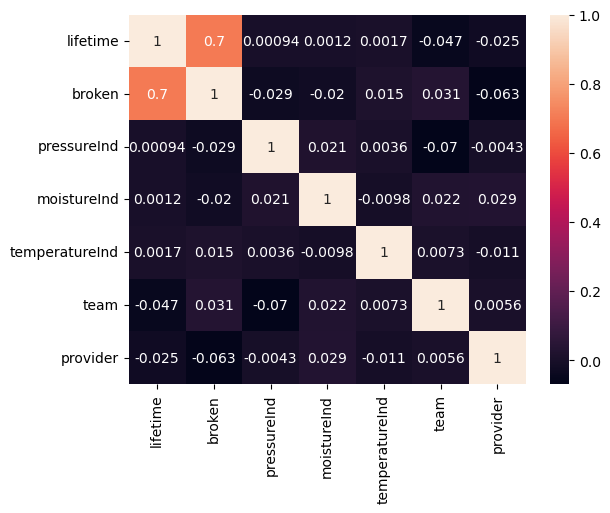

In [8]:
sns.heatmap(cor,annot=True)

# ip/op creation

In [9]:
ip=mnt.drop("broken",axis=1)
op=mnt.broken

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(ip,op,test_size=0.2)

In [11]:
from sklearn.preprocessing import StandardScaler 

In [12]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# applying knn

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred=knn.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [18]:
acc=accuracy_score(y_pred,y_test)
pre=precision_score(y_pred,y_test)
rec=recall_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)

In [19]:
print("ACCURACY",acc)
print('PRECISION',pre)
print('recall',rec)
print('f1_score',f1)

ACCURACY 0.82
PRECISION 0.8068181818181818
recall 0.7888888888888889
f1_score 0.797752808988764


In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [21]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[93, 17],
       [19, 71]], dtype=int64)

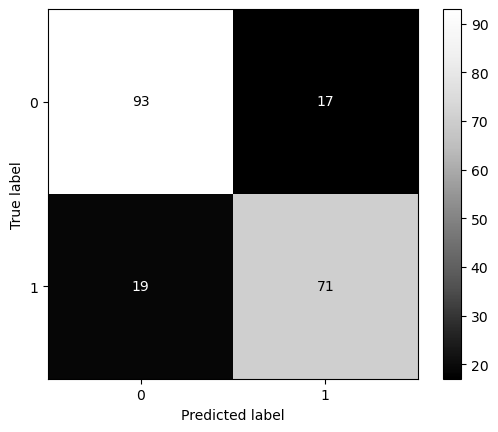

In [29]:
cmd=ConfusionMatrixDisplay(cm)
cmd.plot(cmap='Greys_r')


# SvM- support vector machine

svc- support vector classifier

In [46]:
from sklearn.svm import SVC

In [47]:
svc=SVC(kernel='rbf',C=1000,gamma=0.01)
svc.fit(x_train,y_train)

SVC(C=1000, gamma=0.01)

In [48]:
y_pred2=svc.predict(x_test)

In [49]:
y_pred2

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [51]:
acc=accuracy_score(y_pred2,y_test)
pre=precision_score(y_pred2,y_test)
rec=recall_score(y_pred2,y_test)
f1=f1_score(y_pred,y_test)

In [52]:
print("ACCURACY",acc)
print('PRECISION',pre)
print('recall',rec)
print('f1_score',f1)

ACCURACY 0.95
PRECISION 1.0
recall 0.8979591836734694
f1_score 0.797752808988764


In [53]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [54]:
cm2=confusion_matrix(y_pred,y_test)
cm2

array([[93, 17],
       [19, 71]], dtype=int64)

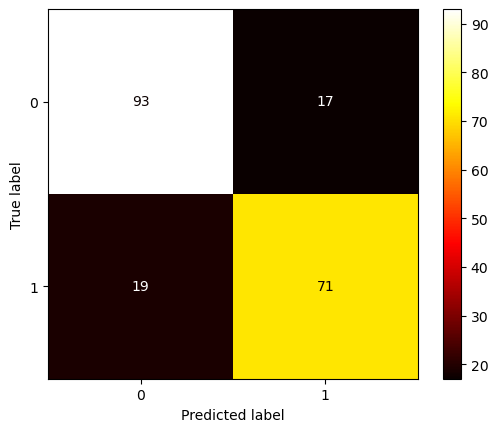

In [56]:
cmd2=ConfusionMatrixDisplay(cm2)
cmd2.plot(cmap='hot')